# Support Vector Machines

The original SVM algorithm was invented by Vladimir N. Vapnik. The current standard approach ("soft margin" SVM) was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVM constructs a hyperplane or set of hyperplanes in a high or infinite dimensional space. SVM can be used for classification, regression, or other tasks. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training data point of any class (so-called functional margin). One single SVM model is for 2 label classification, where label is $y \in \{-1, 1\}$. The hyperplane we want to find to separate the 2 classes is "h". We use the parameters $\vec{w}$ and $b$ to write our classifier as 

$$h_{w,b}(\vec{x}) = g(\vec{w}^T \vec{x} + b)$$

Here, $g(Z) = 1$ if $z \geq 0$ and $g(Z) = -1 $ otherwise.

$\vec{x} \in \mathbf{R}^p$, $y \in \{-1, 1\}$

$(\vec{x}, y)$ is called an example.

## Geometric margin

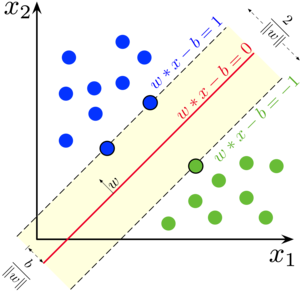

In [2]:
from utils import disp
disp('svm.png')

The decision boundary corresponding to $(w,b)$ is shown along with the vector $\vec{w}$. Note that $\vec{w}$ is orthogonal to the separating hyperplane. Consider the opposing point, $x_1$ (say, a blue point on the boundary) and $x_2$ (say, a green point on the boundary line) which represents training examples closest to each other with labels $y_1 = 1$ and $y_2 = -1$. The distance to the decision boundary or the geometric margin $\rho$ is half of the line segment of $x_1, x_2$, one minimum margin on each side.

The points on the boundary (i.e. margin line) are called the **support vectors**. They have $\alpha_i > 0$

Next, $\vec{w}$ and $b$ are scaled such that the closest points are the line $|w^T x + b| = 1$

We can write the constraint that all points are no closer than lines $| w^T x + b | = 1$ (either side of the plane) by using the labels for signs: $y (w^T x + b) \geq 1$ 

For example, 

if $y = +1$, $w^T x + b \geq 1$, and therefore $y(w^T x + b) \geq 1$. 

if $y = -1$, $w^T x + b \leq 1$, and therefore $y(w^T x + b) \geq 1$)

In other words, the constraints state that all functional margins are at least $1$.

So, we know $w^T x_1 + b = 1$ and $w^T x_2 + b = -1$ (see above), then $w^T (x_1 - x_2) = 2$

Considering that $w$ and $x_1 - x_2$ are parallel vectors, then 

$$||w^T (x_1 - x_2) || = ||w|| \times |x_1 - x_2|| = 2$$

Therefore, $||x_1 - x_2|| = \frac{2}{||w||}$

Since $||x_1 - x_2|| = 2 \rho$, then (by transitive property) $\rho = \frac{1}{||w||}$

The minimum geometric margin is $\rho = \frac{1}{||w||}$.

So, how do we find the optimal boundary which maximizes the separation of the two classes?

## Optimal Margin Classifier

**We want to find a decision boundary that maximizes the geometric margin.** Assume that we are given a linearly separable training set (i.e. that is possible to separate the positive and negative samples using some separating hyperplane). To find the decision boundary that maximizes the geometric margin, we maximize the margin $\rho = \frac{1}{||w||}$ s.t. all points are no closer (on either side) than $|w^T x + b| = 1$ to the separating hyperplane. We can rewrite the constraints on $y(w^T x + b) \geq 1$ for all training data points $x$ with label $y \in \{-1, 1\}$. To make the math nicer, we can write the objective in terms of $||w||^2$. 

Equation (1):

$$
min_{w,b} \frac{1}{2} ||w||^2
$$


Equation (2): 

$$
\hbox{s.t.} y_i (w^T x_i + b) \geq 1, i=1, 2, ..., m
$$

These two 

$$max_{w,b} \frac{1}{||w||} \hbox{s.t.} y_i (w^T x_i + b) \geq 1, i=1,...,m$$

$$min_{w,b} ||w|| \hbox{s.t.} y_i (w^T x_i + b) \geq 1, i=1,...,m$$

This is known as the SVM-primal optimization problem. The above is an optimization problem with a convex quadratic objective (1) and only linear constraints (2). We will use the **lagrange duality** to solve the above constrained optimization problem.

## Convex quadratic optimization - Lagrange duality

Textbook: Boyd and Van den Berglue

### Primal problem 

Consider the following problem $ \min_{x} f(x)$ s.t. $g_i(x) \leq 0$, for $i=1, ..., k$ and $h_j(x) = 0$, for $j=1,...,l$.

Conventional SVM only uses $g(x)$ and does not use $h(x)$.

This is called the primal optimization problem. It has unequality as well as equality constraints. Define the Lagrangian (which describes the state of a dynamic system in terms of position coordinates and their time derivatives)

$$L(x, \alpha, \beta) = f(x) + \sum_{i=1}^k \alpha_i g_i(x) + \sum_{j=1}^l \beta_j h_j(x)$$

where $\alpha_i \geq 0$, ($i=1, ..., k$) and $\beta_j$ ($j=1, ..., k$) are called lagrange multipliers. Consider the quantity $\theta_p(x) = \max_{\alpha, \beta} L(x, \alpha, \beta)$. In the problem $\theta_p(x)$, if $g_i(x) > 0$ or $h_j(x) \neq 0$, this violates any of the primal constraints. One can verify that 

$$\theta_p(x) = \max_{\alpha, \beta} L(X, \alpha, \beta) = \infty$$

Conversely, if the constraints are satisfied for a particular value of $x$, then $\theta_p(x) = f(x)$. So, 

$$
\theta_p = \begin{cases}
f(x)& \hbox{if x satisfies primal constraints}\\
0&o.w.\\
\end{cases}
$$

Hence, the minimization problem has been transformed to 

$$\min_{x} \theta_p(x) = \min_x \min_{\alpha, \beta} L(x, \alpha, \beta)$$

Define $p^\star = \min_{x} \theta_p(x)$ as the value of the primal problem. In fact, we see that hte primal problem has the same solution

## Dual problem

Define $\theta_D(\alpha, \beta) = \min_{x} L(x, \alpha, \beta)$. Pose the dual optimization problem as 

$$\max_{\alpha, \beta} \theta_D(\alpha, \beta) = \max_{\alpha, \beta} \min_x L(x, \alpha, \beta)$$

define the optimal value $d^\star = \max_{\alpha, \beta} \theta_D(\alpha, \beta)$ as the value of the dual problem.

We can see that the dual problem $d^\star$ is pretty similar to our primal problem $p^\star$, except tha thte order of the "max" and "min" are now exchanged.

**The dual problem is much easier to solve than the primal problem.** In fact, there is some relationship between the primal and dual problems: 

$$\max \min (f) \leq \min \max (f)$$

This means that: 

$$d^\star = \max_{\alpha, \beta} \min_x L(x, \alpha, \beta) \leq \min_{x} \max_{\alpha, \beta} L(x, \alpha, \beta) = p^\star$$

That is, $d^\star \leq p^\star$. Therefore, we can use the dual problem to find a lower bound.

The term $p^\star - d^\star$ is the **duality gap**. In general, the dualilty gap is not necessarily equal to zero. Under some conditions (known as Slater's conditions), the duality gap is 0. We say that strong duality holds.

## Saddle point

Resource: (Convex Optimization - Boyd and Vandenberghe, 2004)

**Def:** We define a _saddle point_ as ($x^\star$, $\alpha^\star$) s.t. $\forall x \in \mathbf{R}^n$, $\forall \alpha \geq 0$, 

$$L(x^\star, \alpha) \leq L(x^\star, \alpha^\star) \leq L(x, \alpha^\star)$$

**Thm. 1:** (Saddle point theorem) Let $x^\star \in \mathbf{R}^n$. If there exists $\alpha^\star \geq 0$,s.t. $(x^\star, \alpha^\star)$ is a saddle point for the Lagrangian $L$, then $x^\star$ solves (P). Conversely, if $x^\star$ is a solution of (P) at which the Slater's constraint qualification is satisfied, then there exists $\alpha^\star \geq 0$ s.t. $(x^\star, \alpha^\star)$ is a saddle point for $L$. This is also known as the weak duality theorem.

Question: Why is the space geometrically shaped like a saddle?

**Thm. 2:** If a saddle point exists, then $p^\star = d^\star$. The saddle point theorem says that if $(x^\star, \alpha^\star$) is a saddle point for $L$, then $x^\star$ solves the primal problem and $\alpha^\star$ solves the dual problem, and the optimal values in the primal ($p^\star$) and dual problem ($d^\star$) coincides (i.e. $p^\star = d^\star$). This is known as the strong duality theorem and uses slater's constraint qualifications.

## Karush Kuh Tucker (KKT) conditions

The KKT conditions, also known as Kuhn-Tucker conditions, are 1st derivative tests (also called 1st order necessary conditions) for a solution in in nonlinear programming to be optimal, provided that some regularity conditions are satisfied. The KKT conditions were originally named after Harold W. Kuhn and Albert W. Tucker, who first published the conditions in 1951. Later, scholars discovered that the necessary conditions for this problem had been stated by William Karush in his master's thesis in 1939.

**Thm:** (Karush-Kuhn-Tucker) Suppose that he objective function $f : \mathbf{R}^n \xrightarrow{} \mathbf{R}$ and the constraint function $g : \mathbf{R}^n \xrightarrow{} \mathbf{R}$ and $h_j: \mathbf{R}^n \xrightarrow{} \mathbf{R}$ are continuously differentiable at a point $x^\star \in \mathbf{R}^n$.  $x^\star$ is a solution to the optimization problem iff there exists $\vec{\alpha}$ and $\vec{\beta}$ s.t.

i. Stationarity : $\triangledown f(x^\star) - \sum_{i=1}^k \alpha_i \triangledown g_i (x^\star) - \sum_{j=1}^l \beta_j \triangledown h_j(x^\star) = 0$

First derivative equals zero. Let's say you have a function $h(u)$, if there is a solution $u^\star$, then if you look at $h^\prime(u^\star) = 0$

ii. Primal feasibility: $g(x^\star) \leq 0$ for $i=1, ..., k$ and $h_j(x^\star) = 0$ for $j = 1, ..., l$

The primal problem should have a solution.

iii. Dual feasibility:  $\alpha_i \geq 0$ for $i=1, ..., k$

The dual problem should have a solution.

iv. Complementary slackness (c.s.):  $\alpha_i g_i(x^\star) = 0$ for $i=1, ..., k$

This applies only to inequality constraints. For the $i^{\hbox{th}}$ inequality constraint, c.s. tells us that at $x^\star$ either $g_i(x^\star) = 0$ or the corresponding dual variable $\alpha_i = 0$.  If $g_i(x^\star) = 0$, we say that the inequality constraint is tight at $x^\star$ ($\alpha_i > 0$).

## Solution to SVM problem - Dual problem

Recall our SVM primal problem:

$\min_{w,b} \frac{1}{2} ||w||^2$ s.t. $y_i (w^\prime x_i + b) \geq 1$ for $i=1,..., m$

We will first transform the constraint to standard form.

**Step 1:** Constriant transformed

$g_i(w, b) = -y_i(w^\prime x_i + b) + 1 \leq 0$, $i=1, ..., m$

**Step 2:** Lagrangian

$L(w, b, \alpha) = \frac{1}{2}||w||^2 - \sum_{i=1}^m \alpha_i [y_i (w^\prime x_i + b) - 1]$

where $\alpha_i$ are the lagrangian multipliers. The intuitive meaning of $\alpha_i$ is how important is instance $i$ in forming the final solution. $\alpha_i = 0$ means the instance $i$ is not important at all. 

To find the dual problem, we first minimize $L(w, b, \alpha)$ wrt $w$ and $b$ (for fixed $\alpha$) in order to get $\theta_d = \min_{w,b} L(w,b,\alpha)$

**Step 3:** Differentiate $L$ wrt $w, b$ and set the differential to $0$.

For $w$, 
$$\begin{align*}
\frac{\delta L(w, b, \alpha)}{\delta w} &= w \times \sum_{i=1}^m \alpha_i y_i x_i = 0\\
w &= \sum_{i=1}^m \alpha_i y_i x_i\\
\end{align*}$$

For $b$,
$$\begin{align*}
\frac{\delta L(w, b, \alpha)}{\delta b} &= 0 - \sum_{i=1}^m \alpha_i y_i = 0\\
\sum_{i=1}^m \alpha_i y_i &= 0\\
\end{align*}$$

which provides a restriction on $\alpha$.

**Step 4:** Put the results from step 3 back into $L$

$$\begin{align*}
L(w, b, \alpha) &= \frac{1}{2}||w||^2 - \sum_{i=1}^m \alpha_i [y_i (w^\prime x_i + b) - 1]\\
&=\frac{1}{2} w^\prime w - \sum_i \alpha_i y_i w^\prime x_i - \sum_i \alpha_i y_i b + \sum \alpha_i \\
&= \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j x^\prime_i x_j - \sum_i \sum_j \alpha_i \alpha_j y_i y_j x^\prime_i x_j - \sum_i \alpha_i y_i b + \sum_i \alpha_i\\
&= -\frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j x^\prime_i x_j - \sum_i \alpha_i y_i b + \sum_i \alpha_i\\
&= -\frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j x^\prime_i x_j + \sum_i \alpha_i\\
\end{align*}$$

**Step 5:** Form the dual optimization problem.

$$\begin{align*}
\max_{\alpha} \theta_D (\alpha) &= \max_{\alpha} \min_{w,b} L(w, b, \alpha)\\
&= \max_{\alpha} W(\alpha)\\
\end{align*}$$

So, the SVM-dual optimization problem is 

$$\max_{\alpha} \sum_i \alpha_i - \frac{1}{2} \sum_{i,j} y_i y_j \alpha_i \alpha_j x_i^\prime x_j$$

s.t. $\alpha_i \geq 0$, $i=1, ..., m$ and $\sum_i \alpha_i y_i = 0$.


**Step 6:** KKT conditions for SVM

i. Stationarity

$\frac{\delta L}{\delta W} = 0 = w - \sum_i \alpha_i y_i x_i = 0$

$\frac{\delta L}{\delta b} = 0 = \sum_{i} \alpha_i y_i = 0$

ii. Primal feasibility

$y_i (w^\prime x_i + b) - 1 \geq 0$ for $i=1, ..., m$

iii. Dual feasibility

$\alpha_i \geq 0$ for $i=1, ..., m$

iv. Complementary slackness

$\alpha_i (y_i (w^\prime x_i + b) - 1) = 0$ for $i = 1, ..., m$

The last KKT condition (c.s.) states that $\alpha_i (y_i (w^\prime x_i + b) - 1) = 0$ for each point. Using the 2nd KKT condition (primal feasibility), c.s. means that 

i. $y_i (w^\prime x_i + b) - 1 > 0$ and $\alpha_i = 0$

(i.e. inequality constraint is satisfied but not saturated (b/c $\alpha_i = 0$) )

ii. $y_i (w^\prime x_i + b) - 1 = 0$ and $\alpha_i > 0$
 
(i.e. inequality constraint is saturated)

Inequality constraints which are saturated are said to be "active", while unsaturated constraints are "inactive". The training points with $\alpha_i = 0$ representing inactive constraint does not impact the value of $w$ (i.e. does not contribute to the hyperplane).


For example, if there are 5 components 

$$w = \sum_i \alpha_i y_i x_i = \alpha_1 y_1 x_1 + \alpha_2 y_2 x_2 + \alpha_3 y_3 x_3 + \alpha_4 y_4 x_4 + \alpha_5 y_5 x_5$$

where $\alpha_1 = \alpha_2 = \alpha_5 = 0$ then only $\alpha_3$ and $\alpha_4$ are the only things that impact $w$. These two values are the support vectors. In other words, the training points with $\alpha_i > 0$ representing active constraints on the position of the support hyperplane are called the **support vectors**. These are the vectors that are situated on the support hyperplane and they determine the solution. Typically, there are only few of them, which people call a "sparse" solution.

**Step 7:** Recover the primal solution ($w$ and $b$)

Assume that we have solved the dual and have the solution on $\vec{\alpha}$, call it $\vec{\alpha}^\star$. Then, we can get the optimal value of $w$ by

$$w^\star = \sum_{i=1}^m \alpha_i^\star y_i x_i = \sum_{i \in S} \alpha_i^\star y_i x_i$$

where $S$ is the set of index of support vectors.

Next, we derive a solution for $b$ by using the complementary slackness condition.
Assume that $X_i$ is a support vector (i.e. $\alpha_i > 0$), then 

$$\begin{align*}
y_i (w^\prime x_i + b) - 1 &= 0\\
y_i (w^\prime x_i + b) &= 1\\
y_i^2 (w^\prime x_i + b) &= y_i\\
(w^\prime x_i + b) &= y_i\\
b &= y_i - w^\prime x_i\\
b^\star &= y_i - \sum_i \alpha_i^\prime y_i x^\prime_i x_i\\
\end{align*}$$

where $y_i \in \{ -1, 1\}$.  So, using any suport vector, one can determine $b$. But, for numerical stability, it is better to average over all of them.

**Step 8:** Define the classifier

We are really interested in the function $f(.)$ which can be used to classify future test cases, 

$$f(z) = w^\prime z + b = \sum_i \alpha_i y_i x^\prime_i z + b$$

To classify a new test case $z$, we will use sign $f(z)$, i.e. $z$ is classified as class "+1" if $f(z) \geq 0$ and "-1" if $f(z) \leq 0$.
As a note, a more complicated way of classifying is through "one class classification".


## Remarks

We take a problem in terms of one set of variables (primal variables $w$ and $b$) and restate the problem in terms of the dual variable ($\alpha$). In applying duality, we also convert a minimization problem into a maximization problem. This SVM dual problem is a quadratic program. A quadratic program is one in which the objective function is quadratic. in the variables (in this case $\alpha$) and the constraints are linear. This can be solved using any quadratic programming algorithm ( or package ).

In [3]:
# ToDo

## Non-separable case

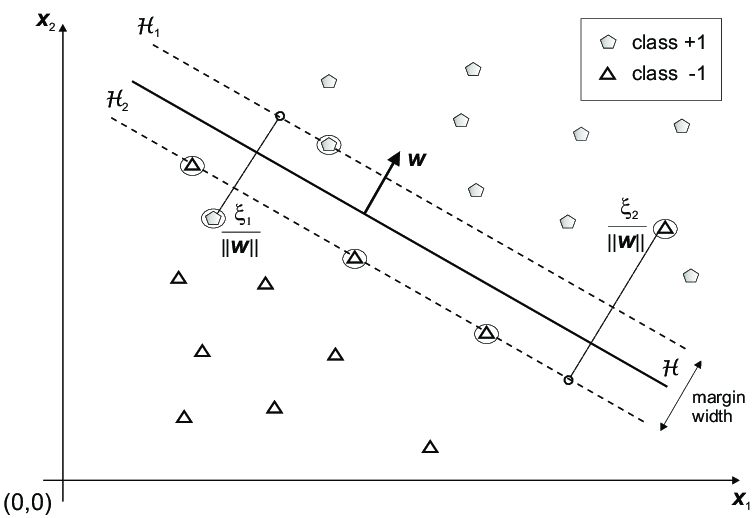

In [1]:
from utils import disp
disp('svm_nonlin_sep.png')

For non-separable case, the problem lies in the constraint, which cannot always be satisfied. So, we relax the constraint by introducing "slack variables" $\zeta_i$ where

$$\begin{cases}
w^\prime x_i + b \leq -1 + \zeta_i & \hbox{for } y_i = -1\\
w^\prime x_i + b \geq 1 - \zeta_i & \hbox{for } y_i = +1\\
\end{cases}$$

where $\zeta_i \geq 0$.

The variables $\zeta_i$ allow for violations of the constraints. We should penalize the objective function for these violations by using some penalty term. Penalty functions of the form $c(\sum_i \zeta_i)^k$ will lead to convex optimization problems for positive integers $k$. For $k=1, 2$ it still is a quadratic program. When $k=2$ it is the L2 SVM. In our case, we choose $k=1$. $c$ controls the tradeoff between the penalty and margin.

The new primal problem becomes

$$\min_{w,b} \frac{1}{2} ||w||^2 + c \sum_i \zeta_i$$

s.t. $y_i(w^\prime x_i + b) - 1 + \zeta_i \geq 0$, $\forall i$ and $\zeta_i \geq 0$, $\forall i$.

The lagrangian is 

$$L(w, b, \zeta, \alpha, \gamma) = \frac{1}{2} ||w||^2 + c\sum_i \zeta_i - \sum_i \alpha_i (y_i (w^\prime x_i + b) + \zeta_i - 1) - \sum_i \gamma_i \zeta_i$$

where $\alpha_i$ and $\gamma_i$ are the Lagranage multpliers. The SVM dual form is 

$$\max_\alpha \sum_i \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j x^\prime_i x_j$$

s.t. $0 \leq \alpha_i \leq c$, $i = 1, ..., m$ and $\sum_i \alpha_i y_i = 0$. 

Note that the constraint $\alpha_i \geq 0$ becomes now $0 \leq \alpha_i \leq c$. In this case, we have 3 types of training points:

i. $\alpha_i = 0$ are non-interesting points

ii. $0 < \alpha_i < c$ are the support vectors on the margin line; 

$y_i (w^\prime x_i + b) = 1$, $\zeta_i = 0$.

iii. $\alpha_i > c$ are a support vector inside the side (or even misclassified). 

$y_i (w^\prime x_i + b) < 1$, $\zeta_i > 0$.

The SV that correspond to $0<\alpha<c$ are called "margin SV". The SV that correspond to $\alpha=c$ are called "non-margin SV".

## Non-linear Non-separable case

So far, we have only considered classifier with a linear decision boundary. How to proceed with a nonlinear problem? Transform $X_i$ to a higher dimensional space (i.e. map the data into a higher dimensional space where it will be linearly separable).

* **Input space:** the spcae where the point $X_i$ is located.

* **Feature space:** the space of $\phi(X_i)$ after transformation with a map $\phi$

Linear operations in the feature space is equivalent to non-linear operations in input space.

## Kernels

Computation in the feature space can be costly because it is high dimensional. Kernels are a clever way of mapping data into a higher dimensional feature space. Notice that the dual problem contains instances through an inner product. The inner product between instances allows us to use kernel function (In other words, we use kernel function as a replacement of the inner product).

Let $\phi : \mathbf{X} \xrightarrow{}{} \mathbf{F}$ where $\mathbf{X}$ is input space and $\mathbf{F}$ is feature space (Hilbert space).

**Definition:** A kernel $k$ is defined as a function s.t. $k(x,z) = \phi(x)^\prime \phi(z)$

$k$ maps data $X \times X \xrightarrow{}{} \mathbf{R}$

So, $(x, z) \xrightarrow{}{} \phi(x,z) = \phi(x)^\prime \phi(z)$

### **Examples of kernels**

1. Polynomial kernel: $k(x, z) = (x^\prime z + c)^d$ where $d$ is the degree of your polynomial

2. Gaussian kernel (or RBF kernel) $k(x,z) = \exp \{ -\frac{||x-z||^2}{\sigma^2} \}$

### **Kernel Trick**

As long as we can calculate the inner product in the feature space $\mathbf{F}$, we do not need the mapping $\phi$ explicitly. So, the key idea of the kernel technique or so-called "kernel trick" is to invert the chain of arguments. Choose a kernel $k$ rather than a mapping $\phi$ before applying a learning algorithm.

In practical use of SVM (or any other ML algo), the user specifies the kernel function. The transformation $\phi(.)$ is not specifically stated. Given a kernel function $k(x,z)$, the transformation $\phi(.)$ is given by its eigenfunctions (a concept in functional analysis). Eigenfunctions can be difficult to construct explicitly. This is why people only specify the kernel without worrying about the exact transformation $\phi$.
Kernel function, being an inner product, is really a similarity measure between 2 objects.

Consider a finite set of $N$ points. Define the matrix 

$$K = \begin{bmatrix}
k(x_1, x_1) & k(x_1, x_2) & \dots & k(x_1, x_N)\\
\vdots\\
k(x_N, x_1) & k(x_N, x_2) & \dots & k(x_N, x_N)\\
\end{bmatrix}$$

This matrix is called the Gram matrix or kernel matrix.
It can be shown that $K$ is a symmetric matrix.
Not any symmetric function $k$ can serve as a kernel function.
The necessary and sufficient condition for $k$ to be a valid kernel is to satisfy **Mercer's theorem**.

## **Mercer's Theorem: Corollary**

The function $k: X \times X \xrightarrow{}{} \mathbf{R}$ is a Mercer kernel iff for each $n \in \mathbf{N}$, the $n \times n$ matrix $K = [k(x_i, x_j)]^n_{i,j=1}$ is positive semi-definite.
Such kernels are called Mercer kernels $z^T M z$.

Note: Do not confuse Mercer kernels (used in statistical learning) with smoothing kernels (used in density estimation).

### **SVM Soft-Margin Algorithm**

**Step 1:** We want to solve $\min_{w, b} \frac{1}{2} ||w||^2 + c \sum_i \zeta_i$ s.t. $y_i (w^\prime \phi(x_i) + b) - 1 + \zeta_i \geq 0$, $\forall i$ and $\zeta_i \geq 0$, $\forall i$ 

**Step 2:** Constraints transformed $g_i (w, b) = 1 - \zeta_i - y_i (w^\prime \phi(x_i) + b) \leq 0$ and $h_i(w,b) = -\zeta_i \leq 0$

**Step 3:** The Lagrangian is $L = \frac{1}{2} ||w||^2 + c\sum_i \zeta_i - \sum_i \alpha_i (y_i(w^\prime \phi(x_i) + b) - 1 + \zeta_i)$ - \sum_i \beta_i \zeta_i

**Step 4:** Differeniate $L$ wrt primal variables

* For $w$, $\frac{\delta L}{\delta w} = w - \sum_i \alpha_i y_i \phi(x_i) = 0$. Therefore, $w = \sum_i \alpha_i y_i \phi(x_i)$

* For $b$, $\frac{\delta L}{\delta b} = 0 - \sum_i \alpha_i y_i = 0$. Therefore, $\sum_i \alpha_i y_i = 0$

* For $\zeta_i$, $\frac{\delta L}{\delta \zeta_i} = c - \alpha_i - \beta_i = 0$. Therefore, $c = \alpha_i + \beta_i, \forall i$

**Step 5:** Put these results back into $L$.

$$\begin{align*}
L &= \frac{1}{2} ||w||^2 + c \sum_i \zeta_i - \sum_i \alpha_i [y_i (w^\prime \phi(x_i) + b) + \zeta_i - 1] - \sum_i \beta_i \zeta_i\\
& \hbox{plug in } c = \alpha_i + \beta_i, \forall i\\
&= \frac{1}{2} ||w||^2 +  \sum_i \alpha_i \zeta_i + \sum_i \beta_i \zeta_i - \sum_i \alpha_i [y_i (w^\prime \phi(x_i) + b) - 1] - \sum_i \alpha_i \zeta_i - \sum_i \beta_i \zeta_i\\
&= \frac{1}{2} ||w||^2 - \sum_i \alpha_i [y_i (w^\prime \phi(x_i) + b) - 1]\\
& \hbox{Therefore, no more $\beta_i$, which is helpful in solving.}\\
& \hbox{plug in } w = \sum_i \alpha_i y_i \phi(x_i)\\
&= \frac{1}{2} ||\sum_i \alpha_i y_i \phi(x_i)||^2 - \sum_i \alpha_i [y_i ((\sum_i \alpha_i y_i \phi(x_i))^\prime \phi(x_i) + b) - 1]\\
&= \frac{1}{2} ||\sum_i \alpha_i y_i \phi(x_i)||^2 - \sum_i \alpha_i [y_i ((\sum_i \alpha_i y_i \phi(x_i))^\prime \phi(x_i) + b) - 1]\\
& ADD LINE\\
& \hbox{because } b \hbox{ is constant and } \sum_i \alpha_i y_i = 0, \hbox{ that term is removed}\\
& ADD LINE\\
&= W(\alpha)\\
\end{align*}$$


**Step 6:** Dual problem

$\max \sum_i \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j k(x_i, x_j)$

s.t. $0 \leq \alpha_i \leq c$
 and $\sum_i \alpha_i y_i = 0$

**Step 7:** The KKT conditions are

1. Stationarity

i. $\frac{\delta L}{\delta w} = 0 \xrightarrow{} w - \sum_i \alpha_i y_i \phi(x_i) = 0$

ii. $\frac{\delta L}{\delta b} = 0 \xrightarrow{} \sum_i \alpha_i y_i = 0$

iii. $\frac{\delta L}{\delta \zeta_i} = 0 \xrightarrow{} c - \alpha_i - \beta_i = 0$

2. Primal constraints

i. $y_i (w^\prime \phi(x_i) + b) - 1 + \zeta_i \geq 0$

ii. $\zeta_i \geq 0$

3. Dual constraints

i. $\alpha_i \geq 0$

ii. $\beta_i \geq 0$

4. Complementary slackness

i. $\alpha_i (y_i (w^\prime \phi(x_i) + b) - 1 + \zeta_i) = 0$

ii. $\beta_i \zeta_i = 0$

**Step 8:** Solution to the primal problem

* $w = \sum_i \alpha_i y_i \phi(x_i)$

* $b$ is obtained using the arguments discussed earlier (i.e. choose support vector and use to find $b$)

* The classifier is 

$$\begin{align*}
f(z) &= w^\prime \phi(z) + b\\
     &= \sum_i \alpha_i y_i \phi(x_i)^\prime \phi(z) + b\\
     &= \sum_i \alpha_i y_i k(x_i z) + b\\
\end{align*}$$

So, a new data $z$ is classified as class 1 if $f(z) \geq 0$ and as class -1 if $f(z) < 0$

### Remarks 

From the KKT conditions, there are 3 possible casese for the values of $\alpha$.

i. $\alpha_i = 0$ then $\zeta_i = 0$, so there's no penalty. A training point $x_i$ is classified correctly.

ii. $0 < \alpha_i < c$ then $y_i (w^\prime \phi(x_i) + b) - 1 + \zeta_i = 0$ and $\zeta_i = 0$. So, $y_i (w^\prime \phi(x_i) + b) - 1 = 0$ and thus $x_i$ is a support vector. These are support vectors on the margin. They are often called "unbounded" or "free".

iii. $\alpha_i = c$ then $y_i (w^\prime \phi(x_i) + b) - 1 + \zeta_i = 0$ and $\zeta_i \geq 0$ and so $x_i$ is a support vector. These support vectors are called "bounded" support vectors. In this case, if $0 \leq \zeta_i <1$, $x_i$ is correctly classified. If $\zeta_i \geq 1$, $x_i$ is misclassified.

**Example:** Suppose we have 5 identically distributed (id) data points. $x_1 = 1, x_2 = 2, x_3 =4, x_4=5, x_5=6$ with 1, 2, 6 as class 1 and 4,5 as class -1 (i.e. $y_1=1, y_2=1, y_3=-1, y_4=-1, y_5=1$).

Use a polynomial kernel of degree 2.

$k(x,y) = (xy + 1)^2$

Set $c = 100$, a hyperparameter.

First, find the $\alpha_i$ ($i=1, 2, ..., 5$) by looking at the dual problem

$$\max_\alpha \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j (x_i x_j + 1)^2$$

s.t. $0 \leq \alpha_i \leq 100$ and $\sum_i \alpha_i y_i = 0$

By using a QP solver, we get $\alpha_i = 0, \alpha_2 = 2.5, \alpha_3 = 0, \alpha_4=7.333, \alpha_5=4.833$

Now, check the constraints. The constraints are satisfied.

The support vectors are $x_2 = 2, x_4=4, x_5=6$.

The discriminant function is 

$f(z) = 2.5(1)(2z + 1)^2 + 7333(-1)(5z + 1)^2 + 4.833(1)(6z + 1)^2 + b$

To find $b$, we use any support vector.

$f(2)=1$ or $f(5)=-1$ or $f(6)=1$

All three give $b=9$. If they are different, we would take the average.

$f(z) = 0.666 z^2 - 5.333z + 9$

In [5]:
#TODO

array([-1.07715115, -2.63301857,  3.21018031,  0.72822803,  2.15742128,
        0.37375715,  0.30734173,  2.26815318, -1.11603656, -0.0942237 ,
        0.        ,  0.        ,  0.        ,  0.        , -2.30423187,
       -0.53215676, -0.31292924, -2.00012044, -1.49633887, -1.86264863])

## Solution to the dual problem

Want to solve the SVM dual problem by using the QP solver.

Recall that the dual problem is 

$$\max_\alpha \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j (x_i x_j + 1)^2$$

s.t. $0 \leq \alpha_i \leq 100$ and $\sum_i \alpha_i y_i = 0$

In matrix form, this dual problem can be written as 

$$\max_\alpha \vec{d}^\prime \vec{\alpha} - \frac{1}{2} \vec{\alpha}^\prime \vec{D} \vec{\alpha}$$

s.t. $\vec{y}^\prime \vec{\alpha} = 0$ and $\vec{I}_m \vec{\alpha} \geq 0$ and $\vec{I}_m \vec{\alpha} \leq c$ which is equivalent to writing $-\vec{I}_m \vec{a} \geq -c$ where $\vec{d} = (1, 1, ...., 1)^\prime$, $\vec{y} = (y_1, y_2, ..., y_m)$, $\vec{\alpha} = (\alpha_1, \alpha_2, ..., \alpha_m)^\prime$, $I_m$ is the identity matrix of rank $m$ and $D$ is the matrix $D = [y_i y_j k(x_i, x_j)]^m_{i,j=1}$ with elements $D_{ij} = y_i y_j k(x_i, x_j)$.

This problem can be made a minimization problem by multiplying the expression by -1.

$$\min_x -\vec{d}^\prime \vec{x} + \frac{1}{2} \vec{x}^\prime \vec{D} x$$

s.t. $\vec{A}^\prime \vec{x} \geq \vec{b}_v$

Rewrite the SVM dual problem in quadprog format yields

$$\min_\alpha -\vec{d}^\prime \vec{\alpha} + \frac{1}{2} \vec{\alpha}^\prime \vec{D} \alpha$$

s.t. $\vec{A}^\prime_m \vec{\alpha} \geq \vec{b}v$ where 

$$A_m = \begin{bmatrix}
y_1&y_2& ...& y_m\\
1&0&...&0\\
0&1&...&0\\
\vdots&0&\ddots&0\\
0&0&...&1\\

-1&0&...&0\\
0&-1&...&0\\
\vdots&0&\ddots&0\\
0&0&...&-1\\

\end{bmatrix}$$

$$b_v = \begin{bmatrix}
0\\
0\\
\vdots\\
0\\
-c\\
-c\\
\vdots\\
-c\\
\end{bmatrix}$$

After obtaining $\alpha^\star$ (solution provided by quadprog)

$$w^\star = \sum_i \alpha^\star_i y_i \phi(x_i)$$

and

$$b^\star = y_j - \sum_i \alpha_i^\star y_i k(x_i, x_j)$$

where $x_j$ is a support vector with label $y_j$.
We do not know $\phi$ but you can input something.

Use average of the $b^\star$ instead in practice.

For prediction, check 

$$sign( \sum_i \alpha_i^\star y_i k(x_i, z) + w_0^\star)$$

## Advantages and Disadvantages

### Advantages

* SVM works relatively well when there is a clear margin of separation

* SVM is more effective in high dimensional space (side-effect of the curse of dimensionality)

* SVM is effective in cases where the number of dimensions is greater than the number of samples.

The graham matrix $K = [k(x_i, x_j)]^n_{i,j = 1}$ which is an $n \times n$ matrix. The $D = [y_i y_j k(x_i, x_j)]^n_{i,j = 1}$ which is an $n \times n$ matrix.

### Disadvantages

* SVM algorithm is not suitable for large datasets because of the $n \times n$ matrices.

* SVM does not perform well when the data has more noise, i.e. classes are overlapping

* SVM has no probability backing. As SVM classifier works by putting data points above and below the classifying hyperplane, there is no probabilistic explanation for the classification.

In [ ]:
# Check for linear separability
from scipy.optimize import linprog

# Classes with class names
dic = {1: '1', -1: '-1'}

for i in dic.keys():
    df["newTarget"] = np.where(df[df.columns[0]] == i, 1 , -1)
     
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    tmp = df.iloc[:,[1,2,3,4]].values
    tmp = sc.fit_transform(tmp)
 
    xx = np.array(df.newTarget.values.reshape(-1,1) * tmp)
    t = np.where(df[df.columns[0]] == i, 1 , -1)
     
    #2-D array which, when matrix-multiplied by x, gives the values of 
    #the upper-bound inequality constraints at x.
    A_ub = np.append(xx, t.reshape(-1,1), 1)
     
    #1-D array of values representing the upper-bound of each 
    #inequality constraint (row) in A_ub.
    b_ub = np.repeat(-1, A_ub.shape[0]).reshape(-1,1)
     
    # Coefficients of the linear objective function to be minimized.
    c_obj = np.repeat(1, A_ub.shape[1])
    res = linprog(c=c_obj, A_ub=A_ub, b_ub=b_ub,
                  options={"disp": False})
     
    if res.success:
        print('There is linear separability between {} and the rest'.format(dic[i]))
    else:
        print('No linear separability between {} and the rest'.format(dic[i]))